# What to do
- chapter 6 of the fish book


In [2]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            
        

In [3]:
import numpy as np

In [4]:
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr *grads[key]
            params[key] += self.v[key]

In [15]:
def long_tube(x):
    return 1/20*x[0]**2 + x[1]**2

In [11]:
X,Y = np.meshgrid(np.arange(-10,10, 0.1), np.arange(-5,5,0.1))

In [12]:
X.shape

(100, 200)

In [13]:
Y.shape

(100, 200)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

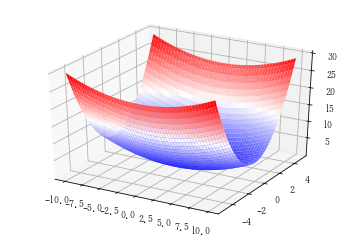

In [16]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, long_tube([X,Y]), linewidth = 0, cmap = 'bwr')

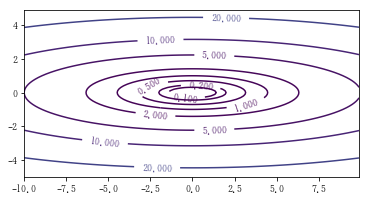

In [17]:
cont = plt.contour(X, Y, long_tube([X,Y]), levels = [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100])
cont.clabel()
plt.gca().set_aspect('equal')

In [18]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

In [58]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

def numerical_gradient_simple(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [59]:
grad = numerical_gradient_simple(long_tube, np.array([X, Y]) )

TypeError: only length-1 arrays can be converted to Python scalars

In [41]:
x = [X,Y]
grad = np.zeros_like(x)
grad.shape
h = 1e-4
it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])


In [ ]:
while not it.finished:
    
    
    it.iternext()

In [45]:
it.iternext()

True

In [50]:
idx = it.multi_index
#x[idx]
x.shape


AttributeError: 'list' object has no attribute 'shape'

In [39]:

i = 0
while not it.finished:
    i += 1
    if i % 1000 == 0:
        print(i)
        
    it.iternext()   
    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
